In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

C:\Users\idsl\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 讀取檔案

In [2]:
training_data = pd.read_csv('adult.data',sep=", ",header=None,engine='python')
test_data = pd.read_csv('adult.test',sep=", ",header=None,engine='python',skiprows=1)
t_d = test_data
training_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


### 原始資料長度

In [4]:
print(f'training_data：{len(training_data)} records')
print(f'test_data：{len(test_data)} records')

training_data：32561 records
test_data：16281 records


### 命名欄位

In [5]:
training_data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
test_data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
feature_cols = ['age','workclass','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']
training_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
test_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [7]:
for column in training_data.columns:
    print(training_data[column].value_counts())
    
## education跟education-num數量一樣所以取education-num即可，故刪除education
training_data = training_data.drop(columns=['education'])
test_data = test_data.drop(columns=['education'])

## fnlwgt 是ID，故刪除
training_data = training_data.drop(columns=['fnlwgt'])
test_data = test_data.drop(columns=['fnlwgt'])

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
9     10501
10     7291

In [8]:
convert = {"income" :{"<=50K":0, ">50K":1}}
training_data = training_data.replace(convert)
convert = {"income" :{"<=50K.":0, ">50K.":1}}
test_data = test_data.replace(convert)
training_data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [9]:
test_data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
16277,64,?,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,0
16278,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
16279,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [10]:
training_data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


### 正規化

In [11]:
from sklearn.preprocessing import MinMaxScaler
# numerical_columns
num_columns = ['age','education-num','capital-gain','capital-loss','hours-per-week']
scaler = MinMaxScaler()

training_data_scaled = pd.DataFrame(scaler.fit_transform(training_data[num_columns]), columns=num_columns)
training_data[num_columns] = training_data_scaled

test_data_scaled = pd.DataFrame(scaler.transform(test_data[num_columns]), columns=num_columns)
test_data[num_columns] = test_data_scaled

training_data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,0.605379,0.010777,0.020042,0.402423,0.240810
std,0.186855,0.171515,0.073854,0.092507,0.125994,0.427581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.000000,0.000000,0.397959,0.000000
50%,0.273973,0.600000,0.000000,0.000000,0.397959,0.000000
75%,0.424658,0.733333,0.000000,0.000000,0.448980,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
test_data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
count,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000
mean,0.298184,0.604860,0.010819,0.020179,0.401962,0.236226
std,0.189715,0.171170,0.075840,0.092540,0.127340,0.424776
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.000000,0.000000,0.397959,0.000000
50%,0.273973,0.600000,0.000000,0.000000,0.397959,0.000000
75%,0.424658,0.733333,0.000000,0.000000,0.448980,0.000000
max,1.000000,1.000000,1.000000,0.865473,1.000000,1.000000


In [13]:
training_data.replace('?', 'other', inplace=True)
test_data.replace('?', 'other', inplace=True)

In [14]:
training_data = pd.get_dummies(training_data)
test_data = pd.get_dummies(test_data)
feature_cols = training_data.columns
training_data['income'] = training_data['income'].astype('int64')
test_data['income'] = test_data['income'].astype('int64')
# training_data['sex'] = training_data['sex'].astype('int64')
# test_data['sex'] = test_data['sex'].astype('int64')
for column in training_data.columns:
    if column not in test_data.columns:
        test_data[column] = 0
        break

In [15]:
X = training_data.drop('income',axis=1)
y = training_data['income']
Xt = test_data.drop('income',axis=1)
Xt.columns = X.columns
yt = test_data['income']

In [16]:
arr = []


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
for depth in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=depth, splitter='best')

    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    arr.append(accuracy_score(y_test, y_pred))
    
mas = max(arr)
for i in range(len(arr)):
    print(f'depth:{i+1}  acc: {arr[i]*100:.3f}%')
    if arr[i]==mas:
        best_depth=i+1
print(f'best_depth：{best_depth}')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test
dt = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, max_leaf_nodes=65, splitter='best')

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

depth:1  acc: 76.248%
depth:2  acc: 82.220%
depth:3  acc: 84.692%
depth:4  acc: 83.571%
depth:5  acc: 84.508%
depth:6  acc: 85.091%
depth:7  acc: 85.306%
depth:8  acc: 85.583%
depth:9  acc: 85.475%
depth:10  acc: 85.291%
depth:11  acc: 86.028%
depth:12  acc: 85.844%
depth:13  acc: 85.045%
depth:14  acc: 84.646%
depth:15  acc: 84.876%
depth:16  acc: 84.017%
depth:17  acc: 84.324%
depth:18  acc: 84.032%
depth:19  acc: 84.969%
best_depth：11


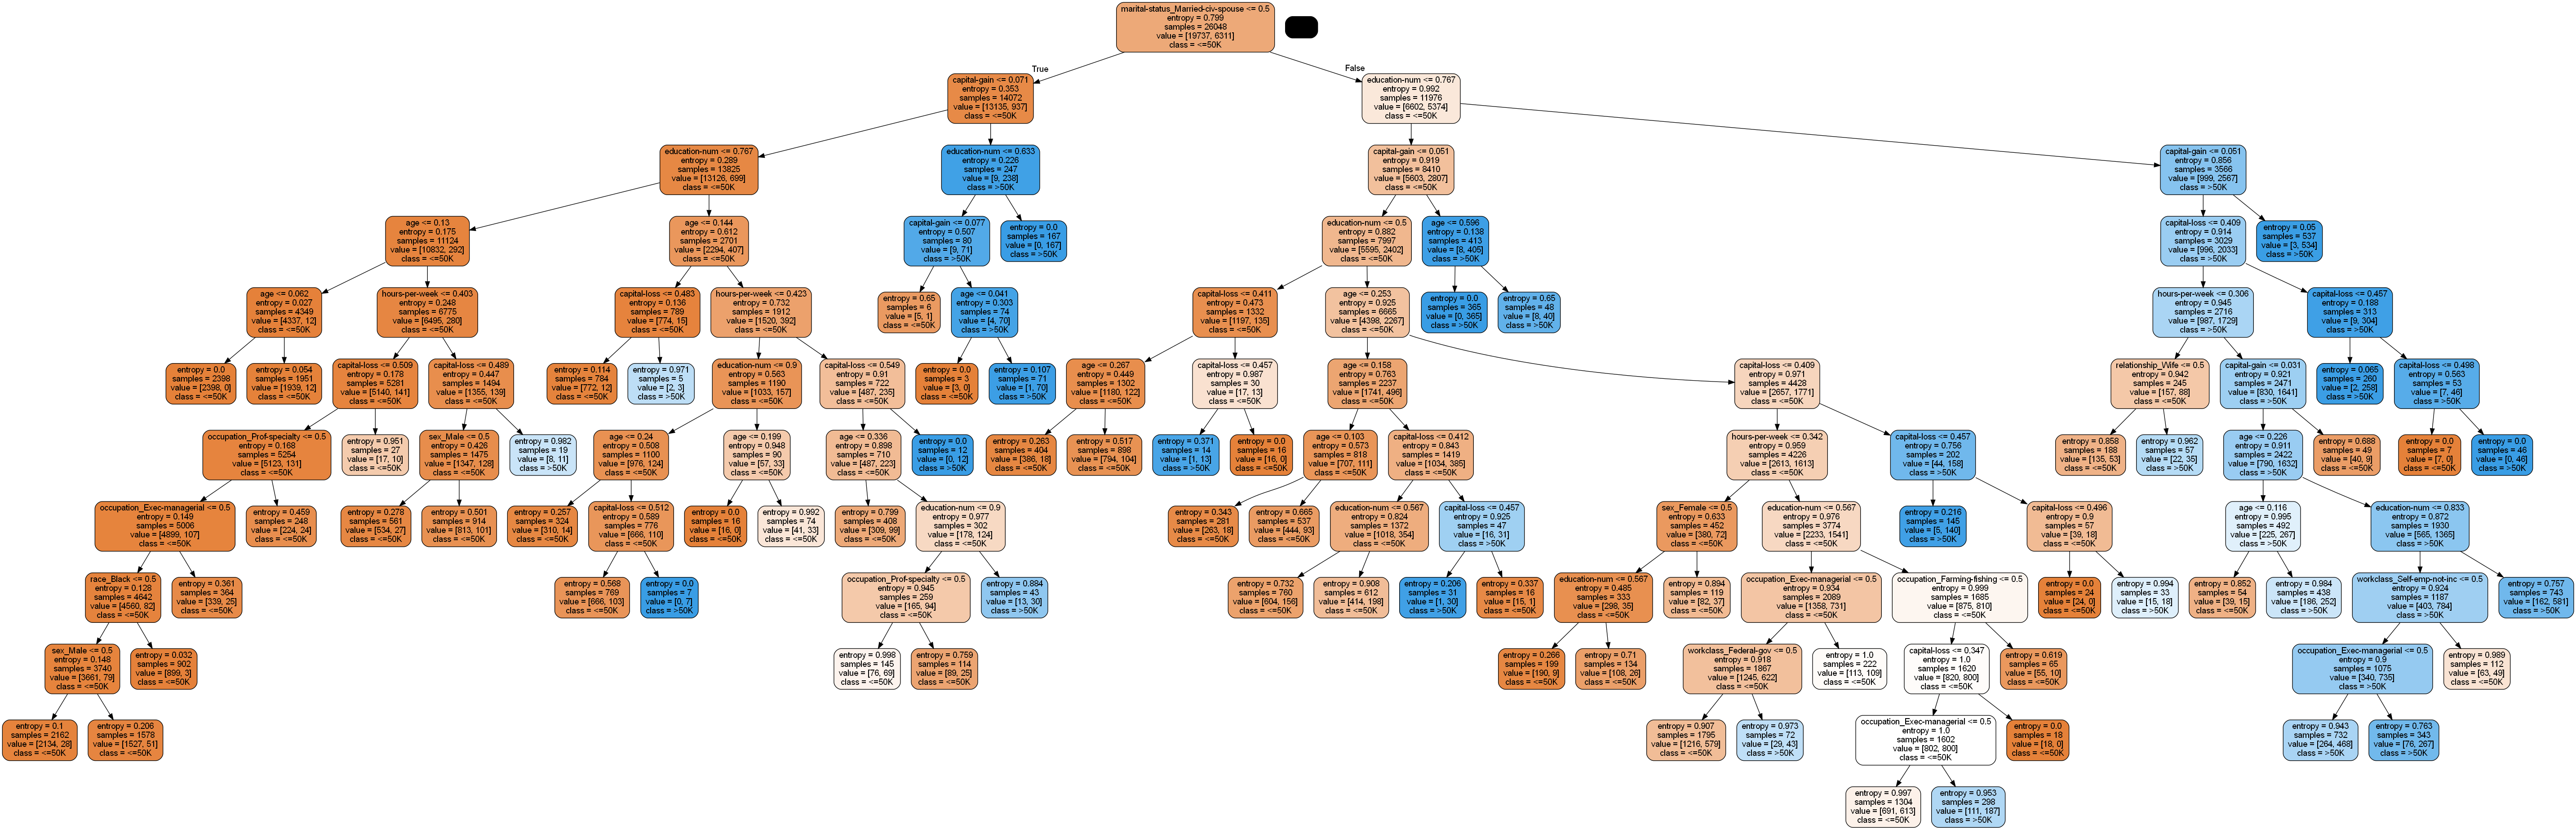

In [17]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['<=50K', '>50K'],  
                         filled=True, rounded=True,  
                         special_characters=False)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png('id3.png')
Image(graph.create_png()) 

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'model_acc: {accuracy*100:.2f}%')

model_acc: 86.66%


## 精確度

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
precision = precision_score(y_test, y_pred)
print(f'acc: {precision*100:.2f}%')

acc: 78.81%


## 召回率

In [20]:
recall = recall_score(y_test, y_pred)
print(f'recall rate: {recall*100:.2f}%')

recall rate: 59.08%


## F1

In [21]:
f1 = f1_score(y_test, y_pred)
print(f'F1 score: {f1*100:.2f}%')

F1 score: 67.54%


## 混淆矩陣

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('confusion_matrix:')
print(conf_matrix)
#TP FN
#FN TN

confusion_matrix:
[[4740  243]
 [ 626  904]]


In [23]:
from openpyxl import Workbook
result_test = dt.predict(X_test)

#產出Excel(Test data)
wb = Workbook()
ws = wb.active
ws.append(['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income','Predict result'])

for i in range(len(result_test)):
    if result_test[i] == 0:
        result = '<=50K.'
    else:
        result = '>50K.'
    #將現在loop到原始資料的列轉為list
    li = t_d.iloc[i,:].tolist()
    #
    li.append(result)
    ws.append(li)
wb.save('Adult_dt_ID3.xlsx')